# Probability distributions



## Content 

- Central Limit Theorem (CLT)




In [22]:
import numpy as np
from scipy.stats import kurtosis, skew

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

## Sampling distribution

In different problems, we often want to estimate a parameter for a population, e.g. the mean or standard deviation. Usually, we cannot collect data from the overall population and the way to estimate the parameters of our population is to consider a sample of size ```n```. Note that the statistic that we obtain for each random sample could be far from the real population value because it is a random sample and for this reason, we perform this process a serie of times, which we call trials.

Example: We consider a population of 100 skiers with race numbers between 0 and 99. Then, mean and standard deviation are 49.5 and 28.866, respectively. Considering 50 random samples of size 10, we compute means and standard deviations:

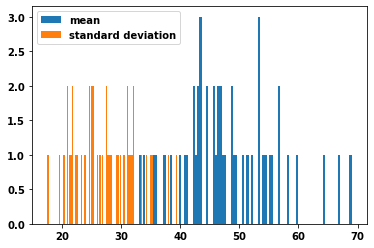

In [44]:
X = np.random.choice(np.arange(0, 100), 100, replace=False)

rs = []
for i in range(50):
    rs.append(np.random.choice(X, 10))
rs = np.array(rs)

plt.hist(rs.mean(axis=1), bins=100, label="mean")
plt.hist(rs.std(axis=1), bins=100, label="standard deviation")
plt.legend();

We obtain two sample distributions of the sample mean and of the sample standard deviation for a sample size equal to 10.

### Central Limit Theorem (CLT)

In probability theory, the CLT states that the distribution of a sample variable approximates a normal distribution as the sample size increases. It assumes that all samples are identical in size and gives only an asymptotic distribution but provides a reasonable approximation with a very large number of observations.

In the following, we want to get the intuition on the CLT. In this purpose, we define a non-normal distributions:

- Distrib 1
- Distrib 2 
- Distrib 3



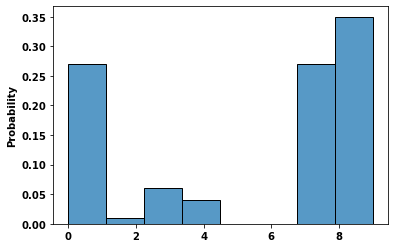

interactive(children=(IntSlider(value=100, description='samples', max=300, min=-100), Output()), _dom_classes=…

In [45]:
elements = np.arange(10)
probabilities = [0.26, 0, 0.01, 0.04, 0.06, 0, 0, 0.29, 0.13, 0.21]

X = np.random.choice(elements, 100, p=probabilities)
sns.histplot(X, stat='probability')

interact(plot1, Samples=(10, 1000, 10));

We can draw samples from it and for each of these samples calculate its mean and visualize the distribution of the sample mean for a sample size equal to 5. We can do it as many times as desired.

In [57]:
elements = np.arange(10)
probabilities = [0.26, 0, 0.01, 0.04, 0.06, 0, 0, 0.29, 0.13, 0.21]

def plot1(Samples=100, Trials=5):
    s = []
    for i in range(Samples):
        s.append(np.random.choice(elements, Trials, p=probabilities))
    s = np.mean(np.asarray(s), axis=1)
    
    sns.histplot(s, stat='probability')
    plt.xlim([0, 10])
    
    print('Mean:\t %.2f' % np.mean(s))
    print('Std:\t %.2f' % np.std(s))
    # print('Kurtosis: %.2f' % kurtosis(s))
    # print('Skew:\t %.2f' % skew(s))
    print(' ')
    
interact(plot1, Samples=(100, 10000, 100), Trials=(1,100,1));

interactive(children=(IntSlider(value=100, description='Samples', max=10000, min=100, step=100), IntSlider(val…

This distribution does not look like the original distribution and the CTL tells us that as you take more samples and calculate the mean, the resulting distribution, will approximate a normal distribution. The CTL also tells us that the approximation becomes better as the sample size increases.

Note that for the normal distribution, the kurtosis and skewness should be zero.